<a href="https://colab.research.google.com/github/JavierPerrote/DESARROLLO-DE-UN-SENSOR-SOFTWARE-PARA-LA-ESTIMACION-DE-MATERIA-SECA-EN-UN-PROCESO-INDUSTRIAL/blob/main/Graficos_Shewhart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math as math
import scipy.signal
import re

In [ ]:
dataFile = pd.read_csv('sensor.csv')

Para todas las variables

KeyboardInterrupt: ignored

<Figure size 4000x5000 with 0 Axes>

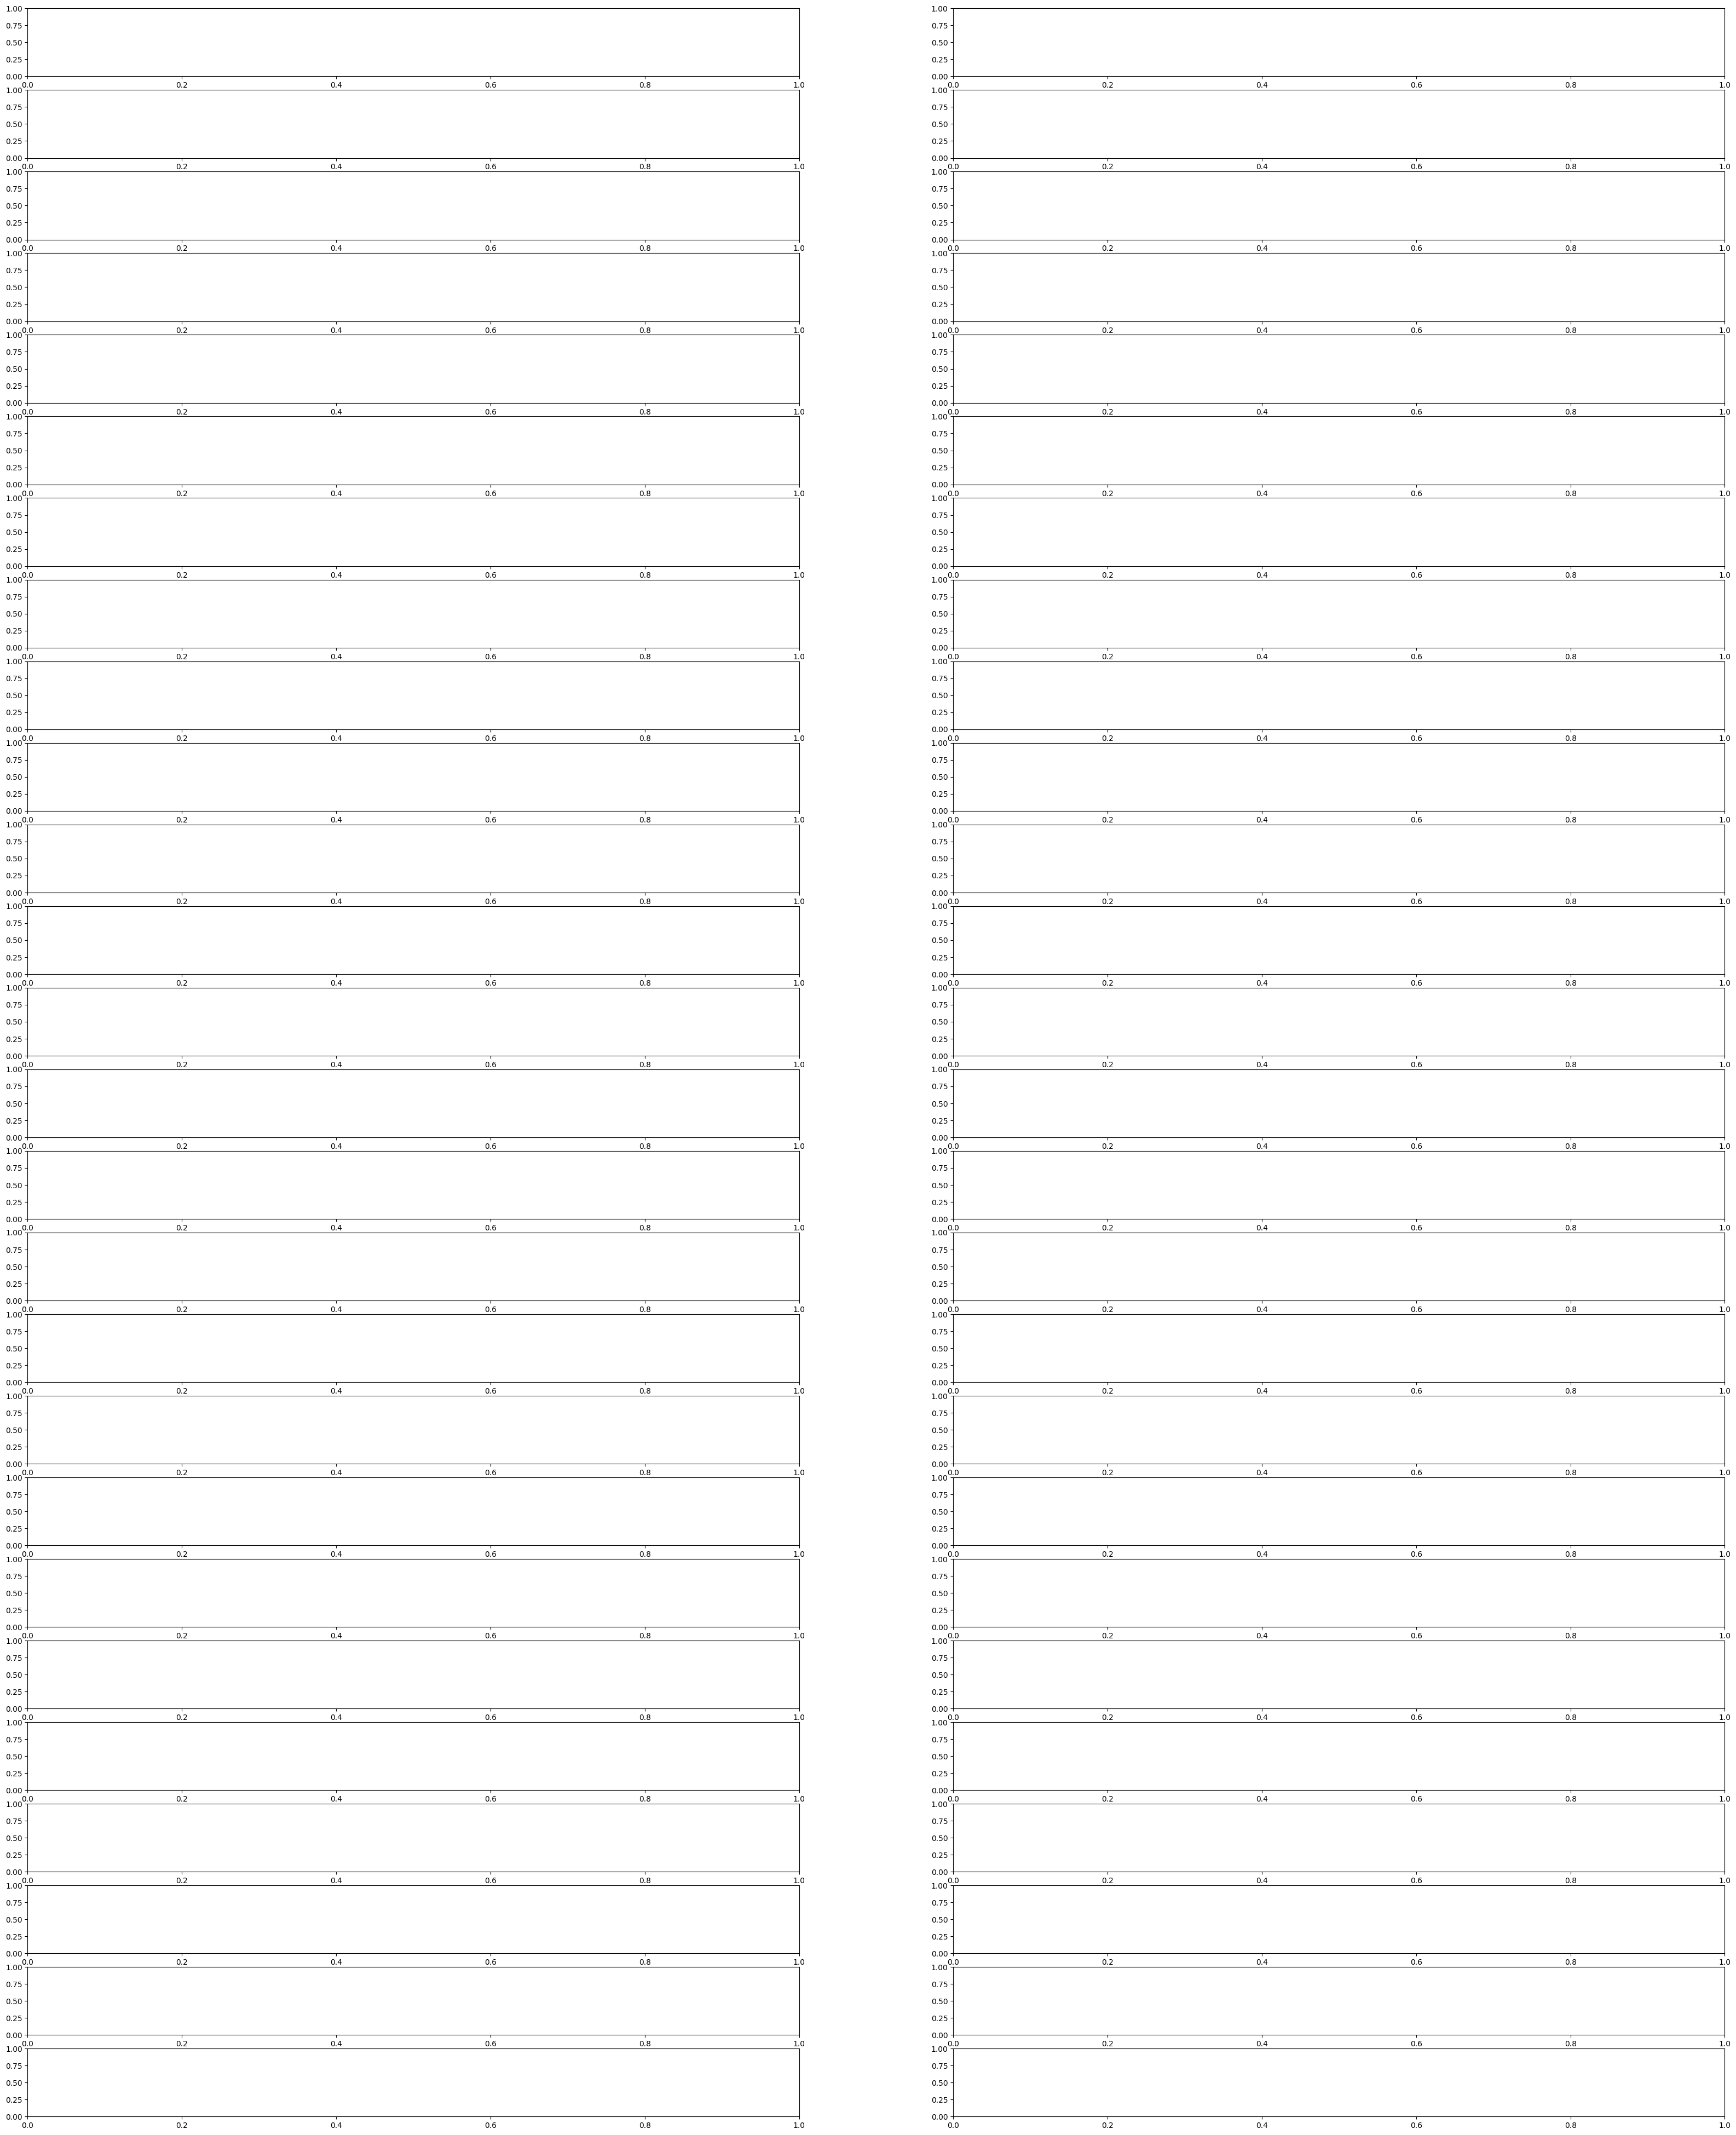

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm



# Configurar la figura
nRowsG = math.ceil(len(dataFile.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [40, 50]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(dataFile.columns):
    # Calcular los extremos y la media
    mean = np.mean(dataFile[column])
    std = np.std(dataFile[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


PRESIONES DEL VAPOR

<Figure size 2000x1500 with 0 Axes>

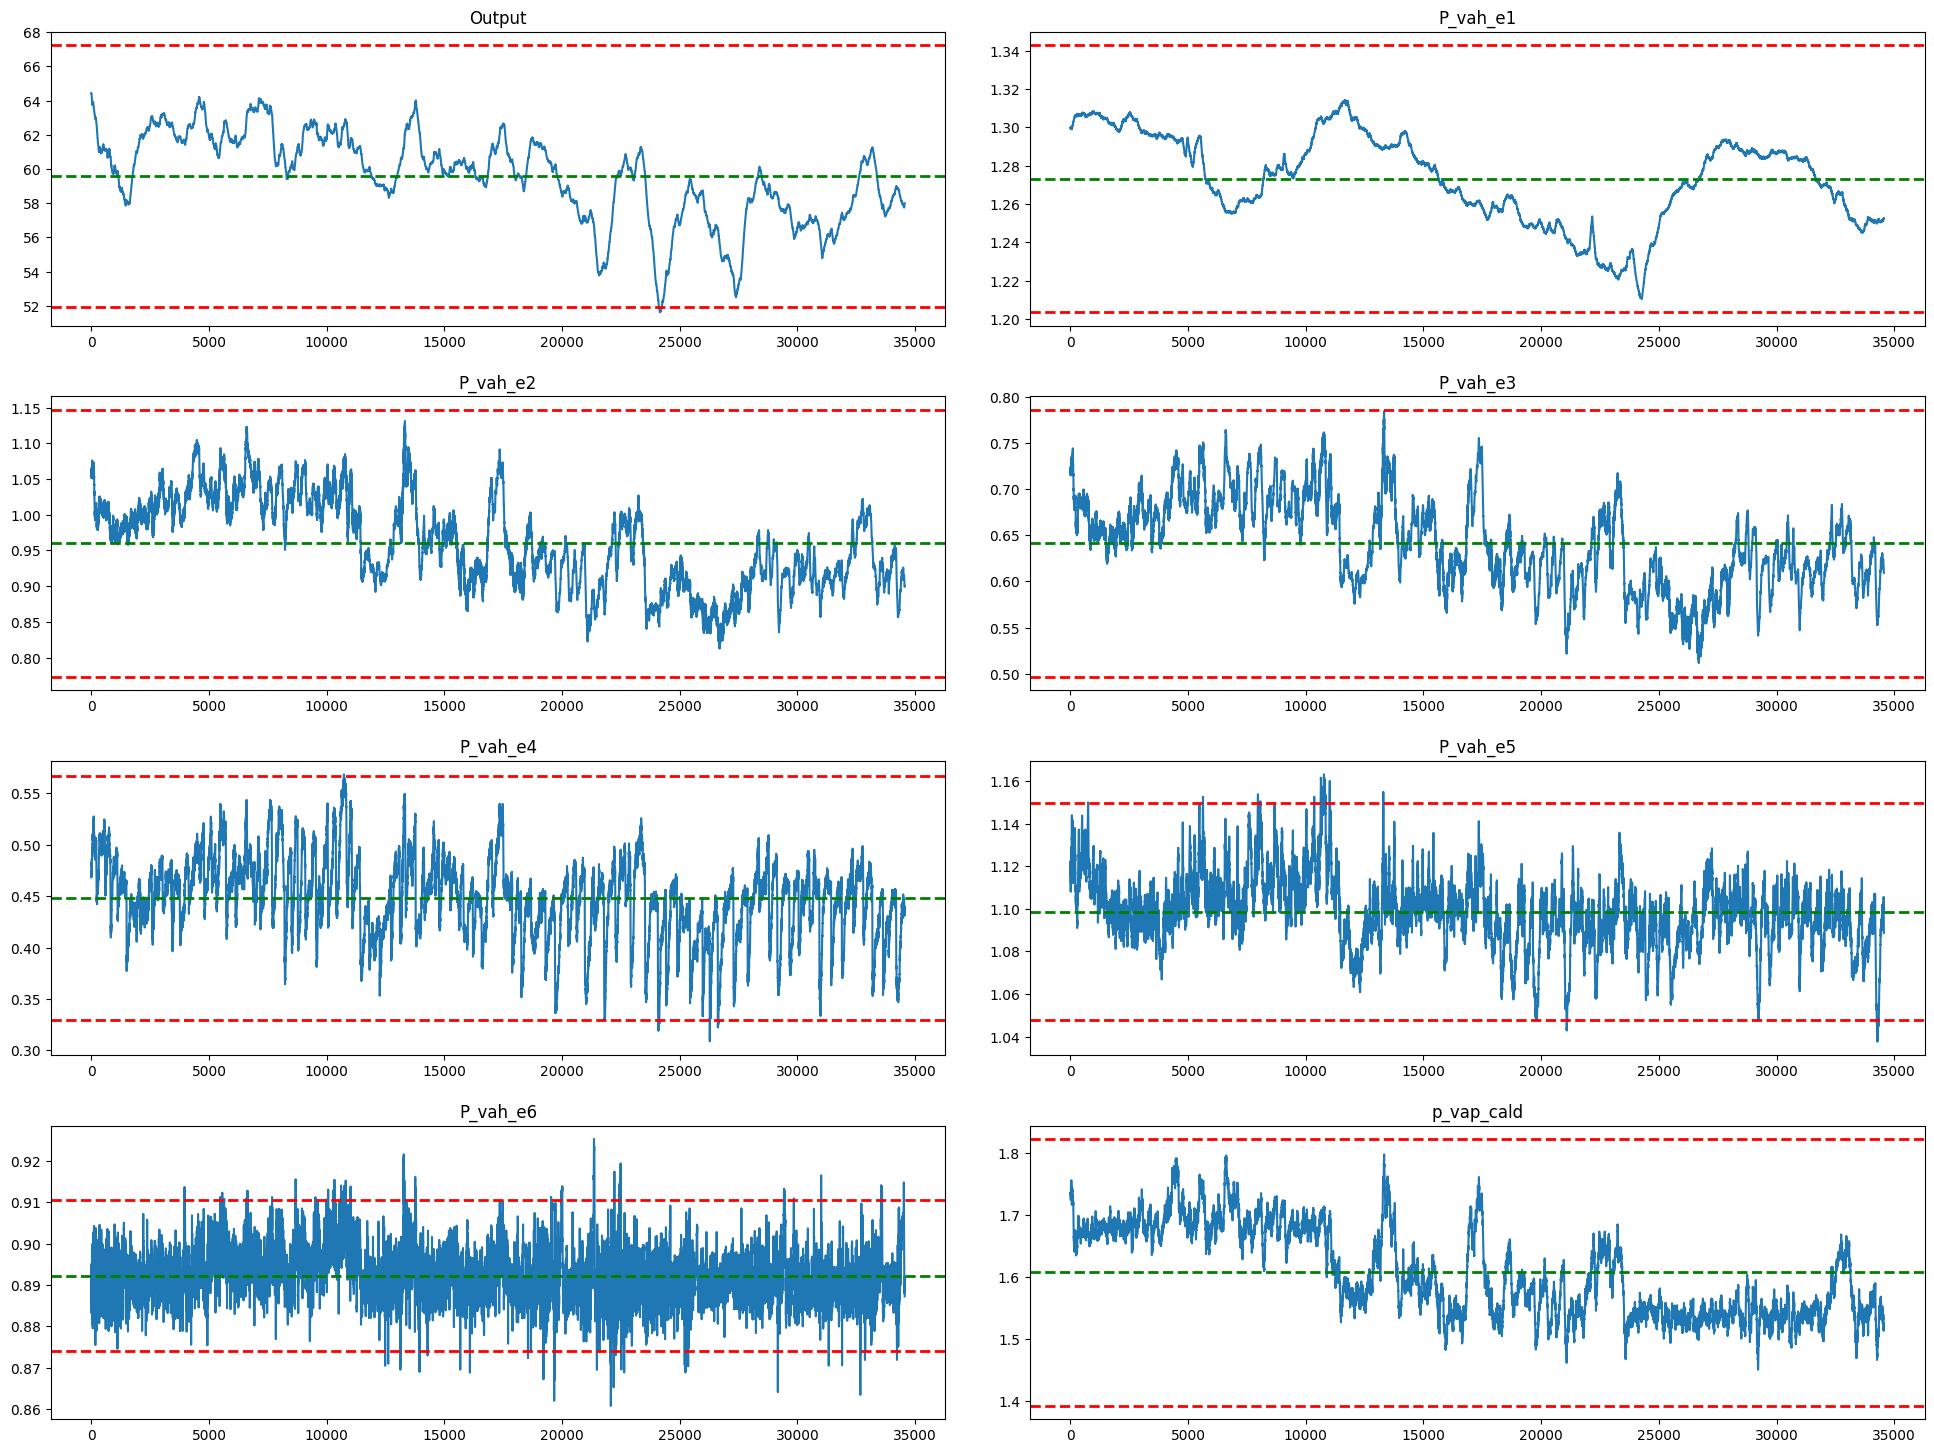

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['Output','P_vah_e1','P_vah_e2','P_vah_e3','P_vah_e4','P_vah_e5','P_vah_e6','p_vap_cald']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()

TEMPERATURAS DEL VAPOR

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos


data = dataFile.loc[:,['T_vah_e1', 'T_vah_e2', 'T_vah_e3',
       'T_vah_e4', 'T_vah_e5', 'T_vah_e6', 'T_vap_cald','T_ent_e1']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


TEMPERATURAS DEL JUGO

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data =  dataFile.loc[:,['e1_T_jugo_salida',
'e2_T_jugo_salida', 'e3_T_jugo_salida', 'e4_T_jugo_salida',
'e5_T_jugo_salida', 'e6_T_jugo_salida']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


TEMPERATURAS EN LOS CAMBIADORES

<Figure size 2000x1500 with 0 Axes>

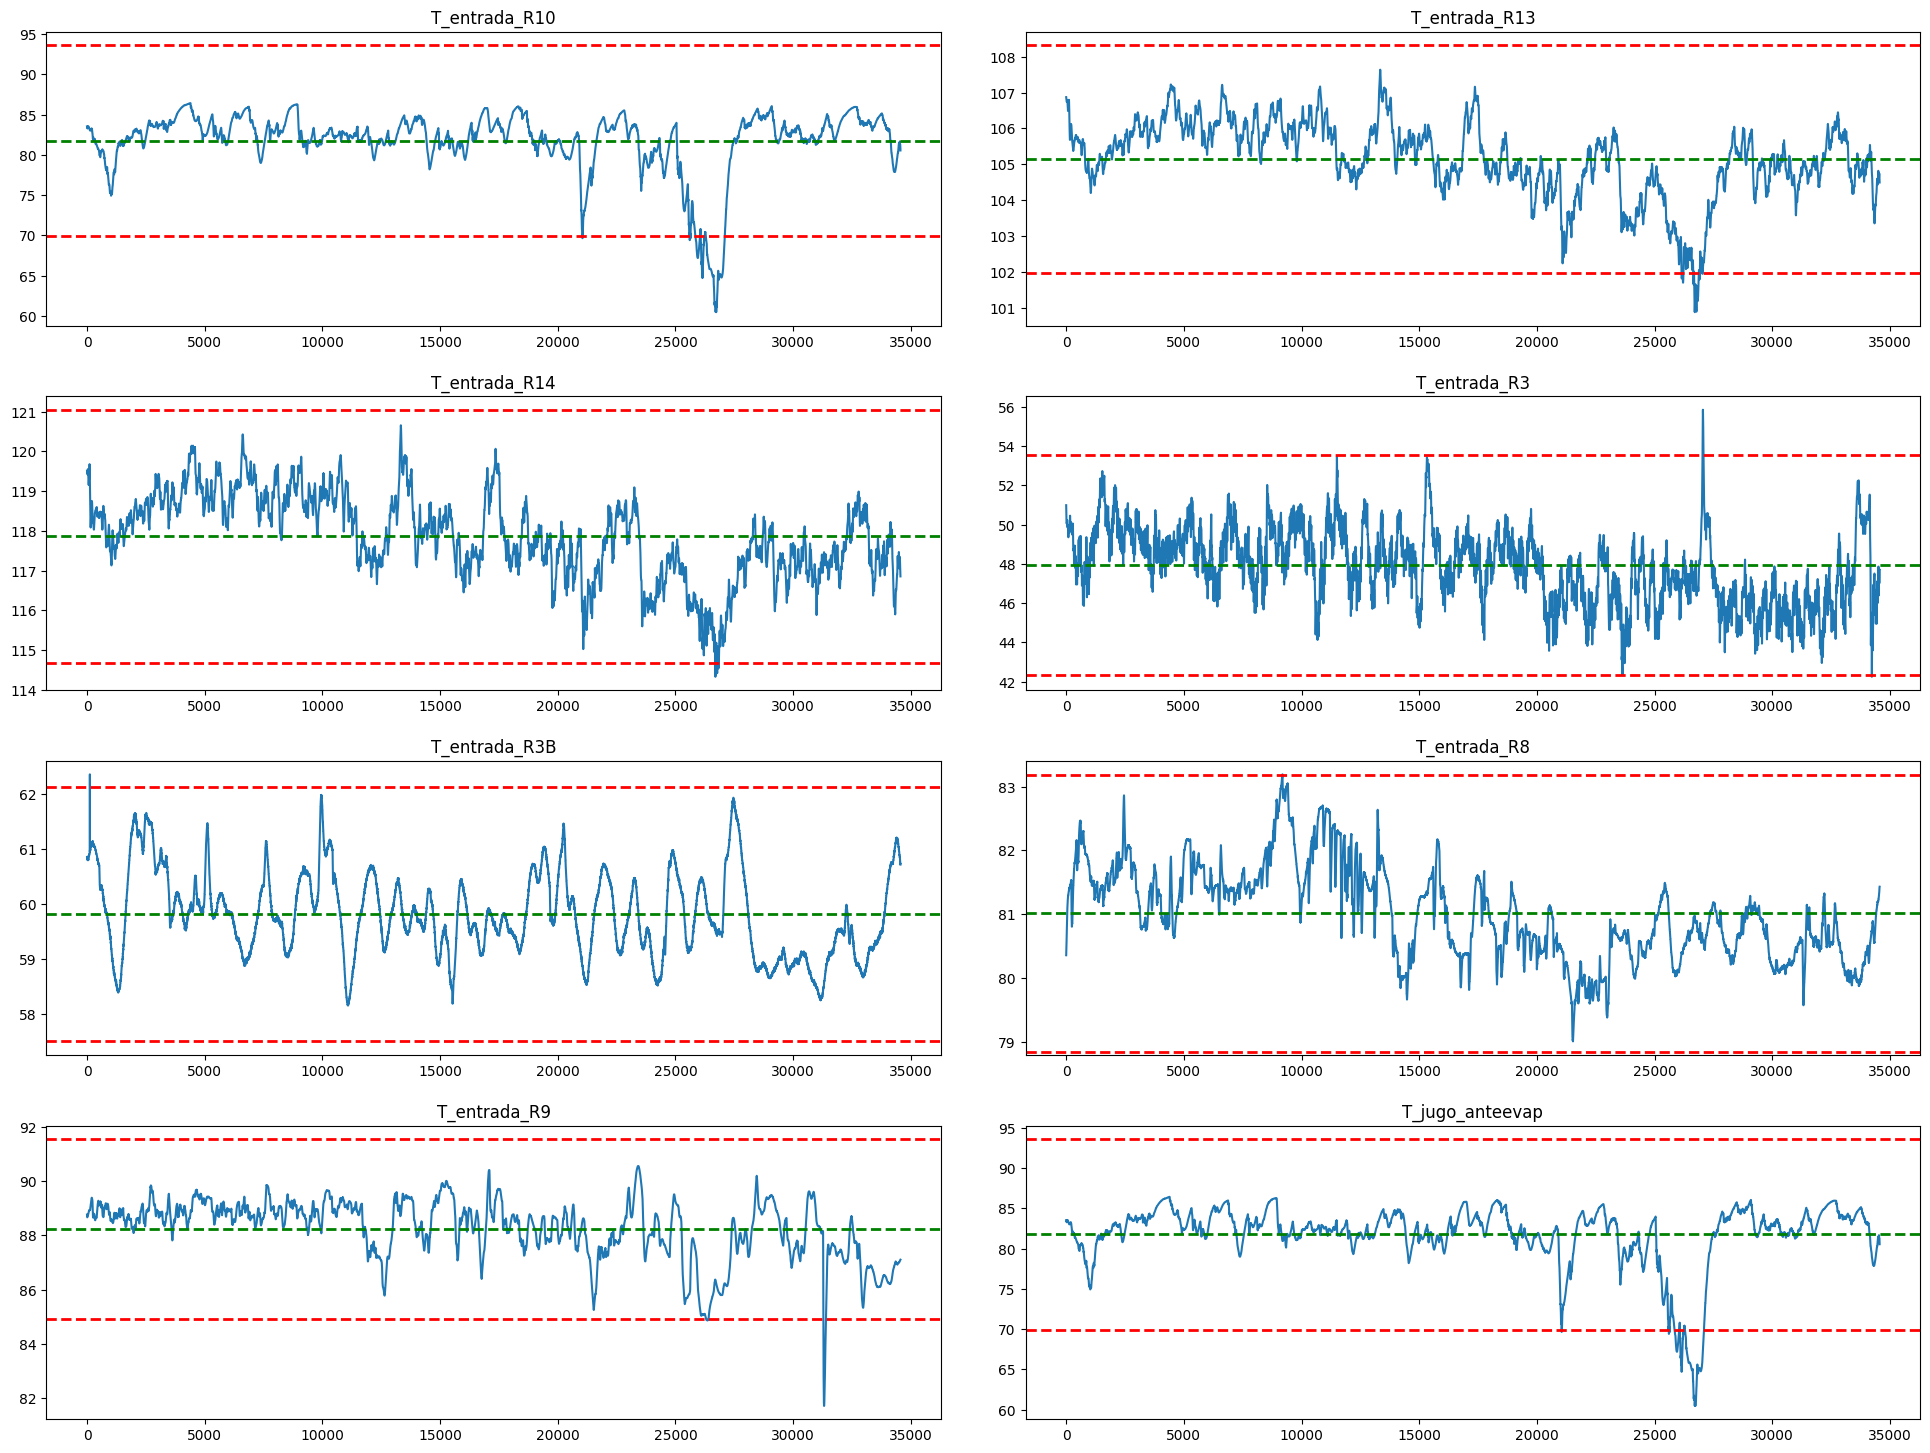

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['T_entrada_R10', 'T_entrada_R13',
       'T_entrada_R14', 'T_entrada_R3', 'T_entrada_R3B', 'T_entrada_R8',
       'T_entrada_R9', 'T_jugo_anteevap']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['T_salida_R10', 'T_salida_R11',
       'T_salida_R12', 'T_salida_R3', 'T_salida_R3A', 'T_salida_R3B']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,[
       'T_salida_R4', 'T_salida_R5', 'T_salida_R6', 'T_salida_R7',
       'T_salida_R8', 'T_salida_R9']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


FLUJOS MASICOS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data =  dataFile.loc[:,['W_jugo_R10',
       'W_jugo_R3', 'W_jugo_R3B', 'W_jugo_R4', 'W_jugo_R8', 'W_jugo_R9',
       'W_jugo_anteevap', 'W_jugo_salida_e6', 'W_vap_cald']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


---------------------------------------

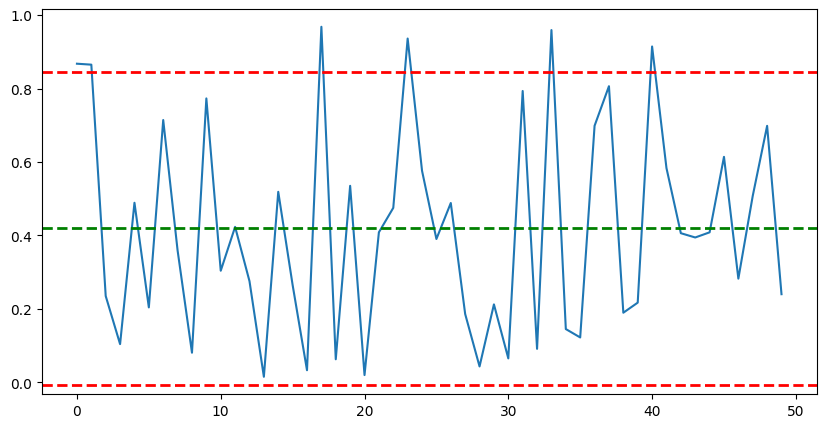

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar los datos aleatorios de la evolución temporal de una sola variable
data = np.random.rand(50)

# Calcular los valores promedio y los límites de control
mean = np.mean(data)
sigma = np.std(data)
UCL = mean + 1.5*sigma
LCL = mean - 1.5*sigma

# Crear la figura y el gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Añadir una línea para la variable y los límites de control
ax.plot(data, label='Mi variable')
ax.axhline(y=UCL, color='r', linestyle='dashed', linewidth=2, label='Límite de control superior')
ax.axhline(y=LCL, color='r', linestyle='dashed', linewidth=2, label='Límite de control inferior')
ax.axhline(y=mean, color='g', linestyle='dashed', linewidth=2)



# Mostrar la gráfica
plt.show()



FIGURA 13

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos
data = dataFile.loc[:,['P_vah_e5','P_vah_e6','T_entrada_R10', 'T_salida_R10','T_entrada_R13',
        'T_entrada_R3', 'T_entrada_R9', 'T_salida_R9','W_jugo_R10',
       'W_jugo_R3' ]]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [25, 20]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(data[column])
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


GRAFCOS DE CONTROL CON EL FILTRO

In [ ]:
# Primero generamos el filtro
dataFiltered = dataFile.copy()
for index,column in enumerate(dataFile.columns):


    if (column == 'Output'):
        b, a = scipy.signal.butter(2, 0.007)
        dataFiltered[column] = scipy.signal.filtfilt(b, a, dataFile[column], axis=0,padlen=100 )


    if re.match(r'^[pP]_va[hp]', column):
        b, a = scipy.signal.butter(2, 0.003)
        dataFiltered[column] = scipy.signal.filtfilt(b, a, dataFile[column], axis=0,padlen=100 )


    if (column.startswith('T_')):
        b, a = scipy.signal.butter(2, 0.005)
        dataFiltered[column] = scipy.signal.filtfilt(b, a, dataFile[column], axis=0,padlen=100 )


    if re.match(r'^e._T', column):
        b, a = scipy.signal.butter(2, 0.005)
        dataFiltered[column] = scipy.signal.filtfilt(b, a, dataFile[column], axis=0,padlen=100 )

    if (column.startswith('W_')):
        b, a = scipy.signal.butter(2, 0.005)
        dataFiltered[column] = scipy.signal.filtfilt(b, a, dataFile[column], axis=0,padlen=100 )


PRESIONES DEL VAPOR

<Figure size 2000x1500 with 0 Axes>

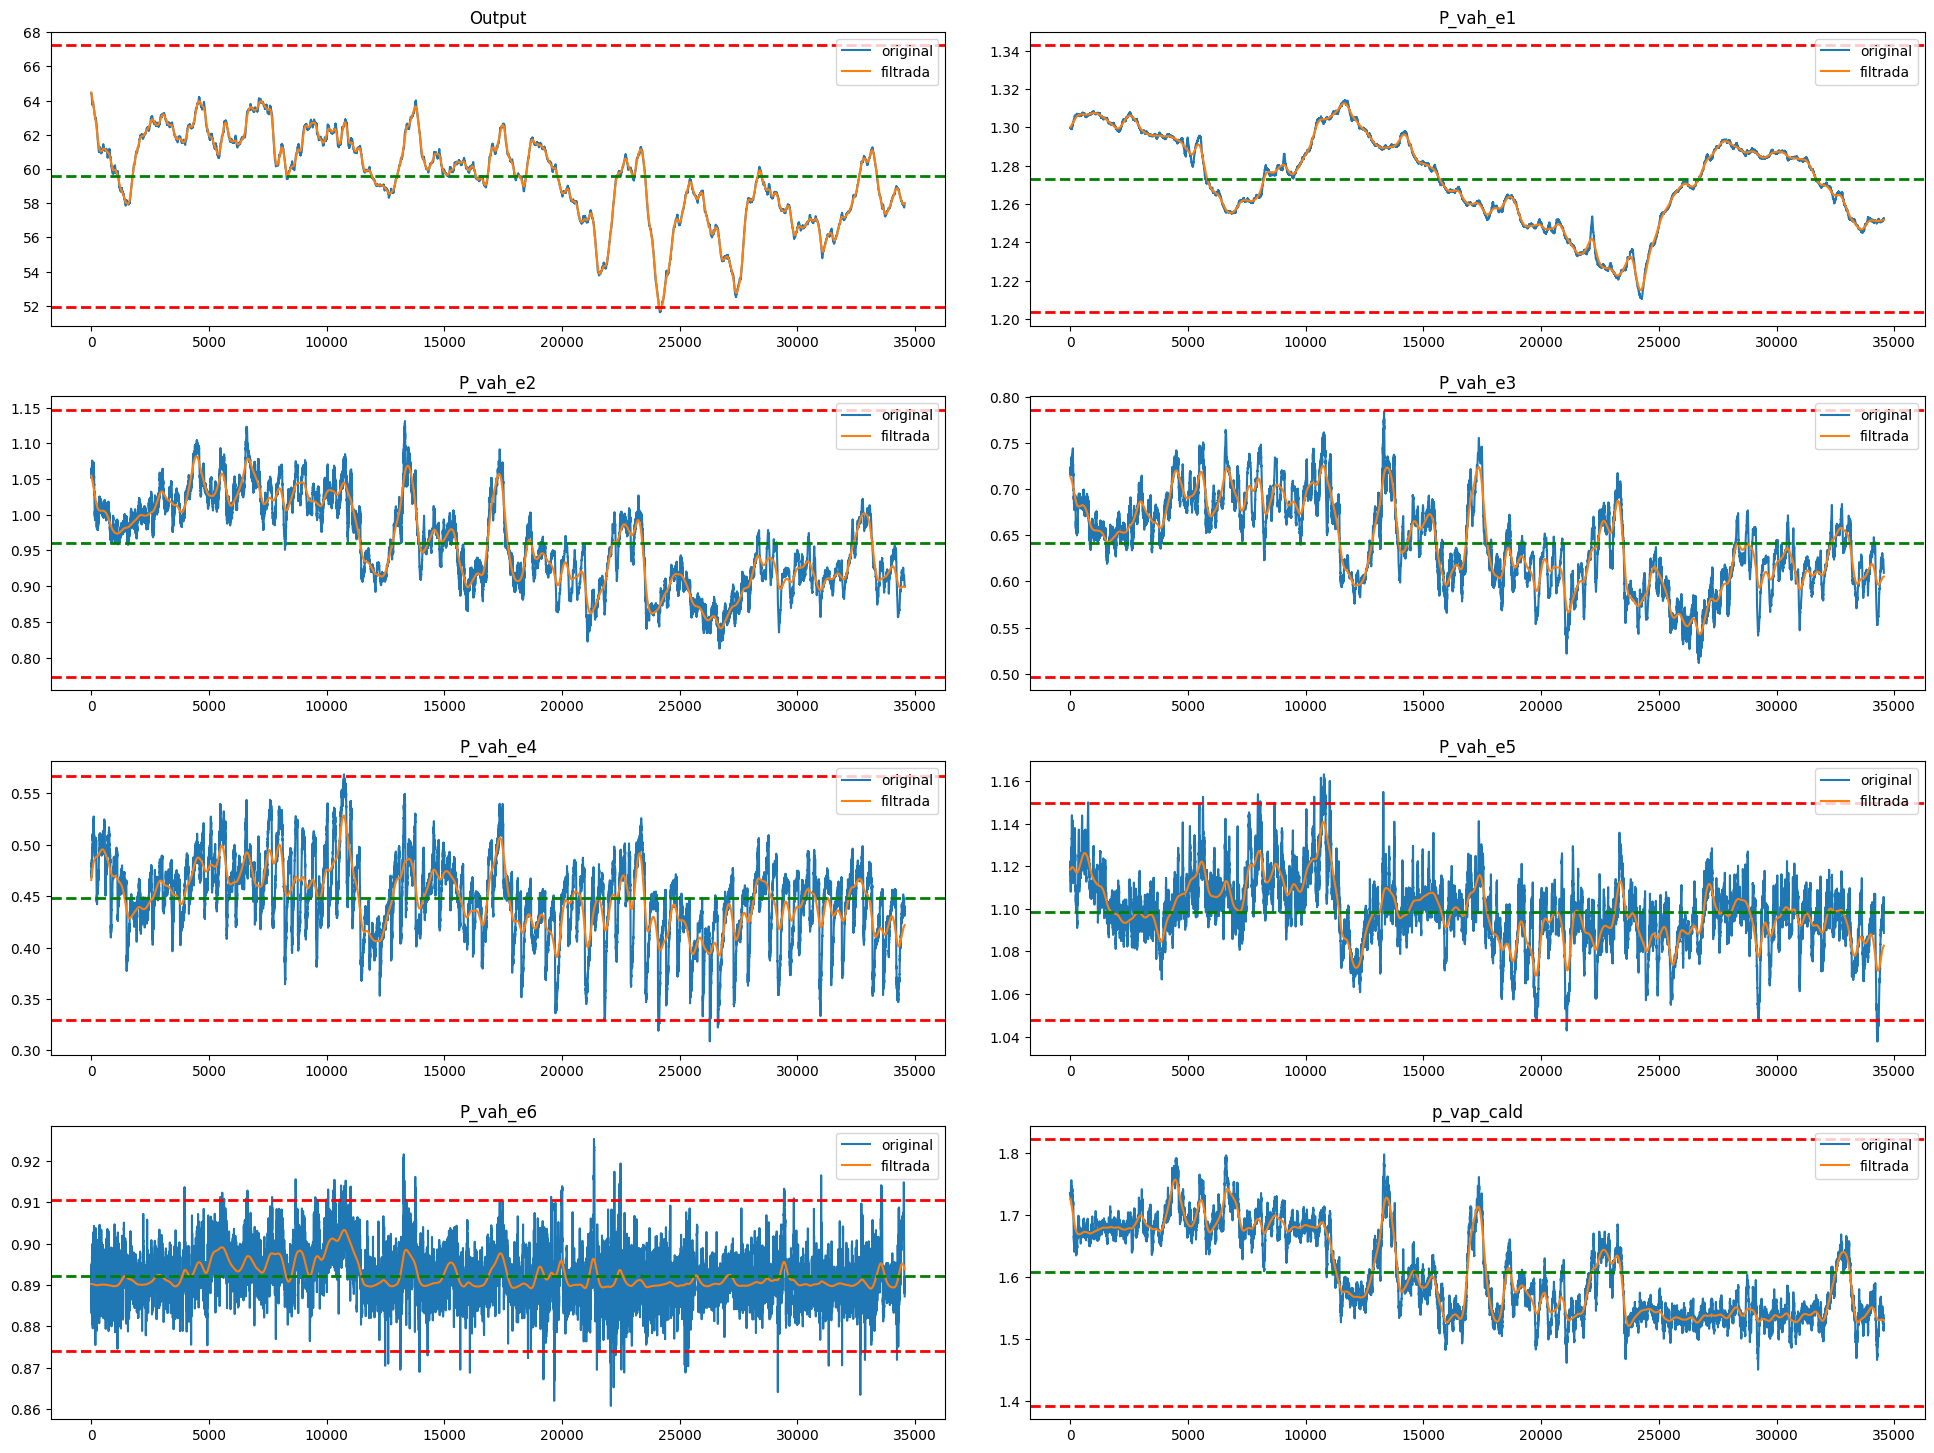

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['Output','P_vah_e1','P_vah_e2','P_vah_e3','P_vah_e4','P_vah_e5','P_vah_e6','p_vap_cald']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma

    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column], label='original')
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFiltered[column], label='filtrada')
    axs[index // ncolumnsG, index%ncolumnsG ].legend()
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()

TEMPERATURAS DEL VAPOR

<Figure size 2000x1500 with 0 Axes>

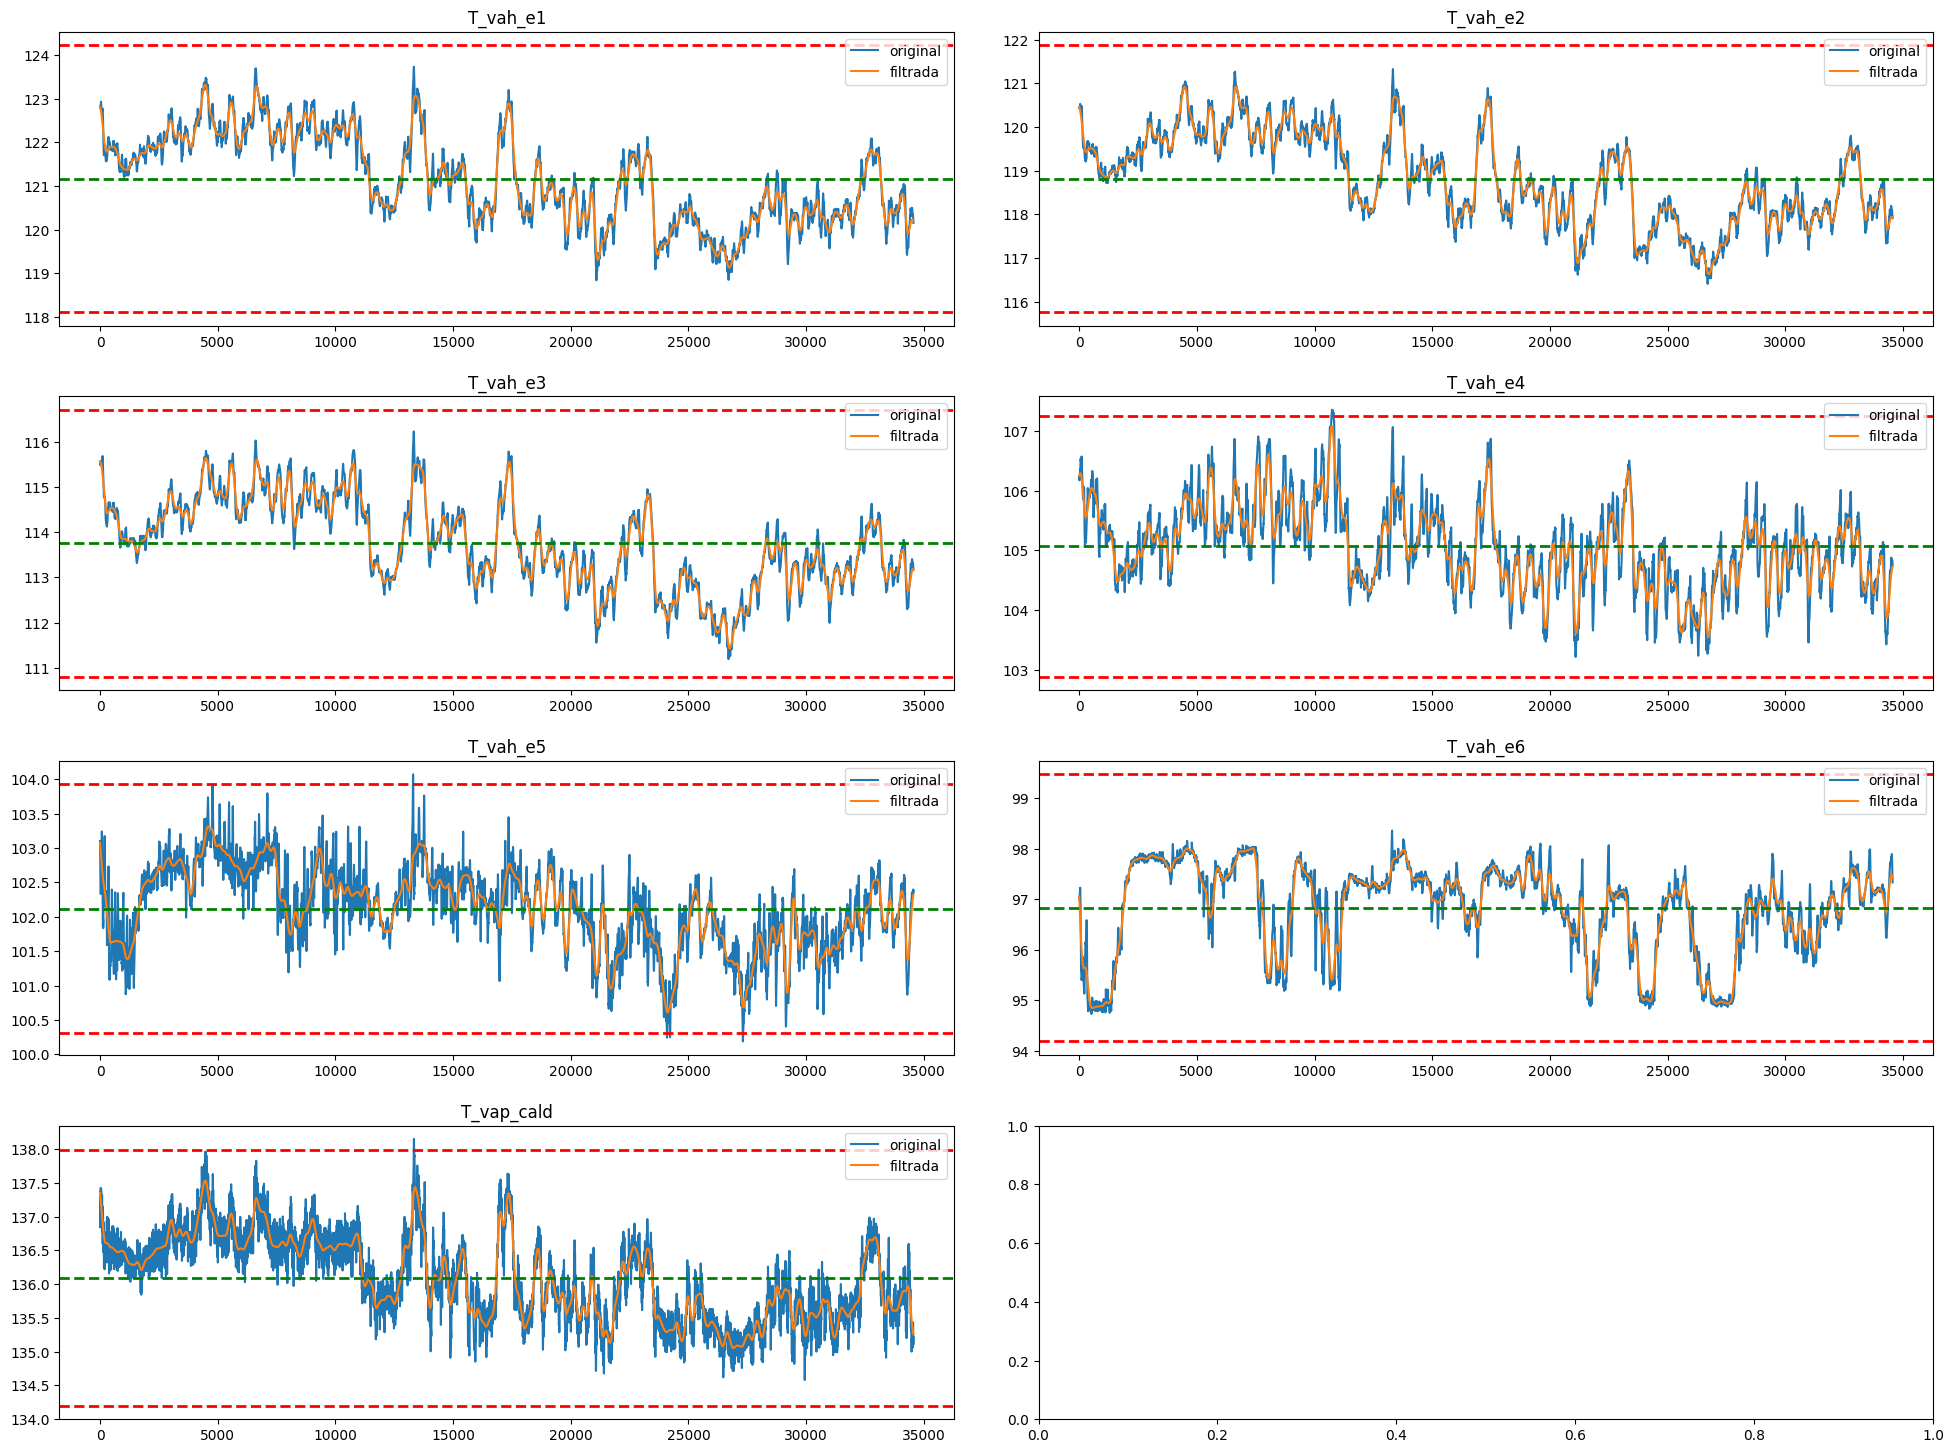

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos
data = dataFile.loc[:,['T_vah_e1', 'T_vah_e2', 'T_vah_e3',
       'T_vah_e4', 'T_vah_e5', 'T_vah_e6', 'T_vap_cald']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma

    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column], label='original')
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFiltered[column], label='filtrada')
    axs[index // ncolumnsG, index%ncolumnsG ].legend()
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()

TEMPERATURA DEL JUGO

<Figure size 2000x1500 with 0 Axes>

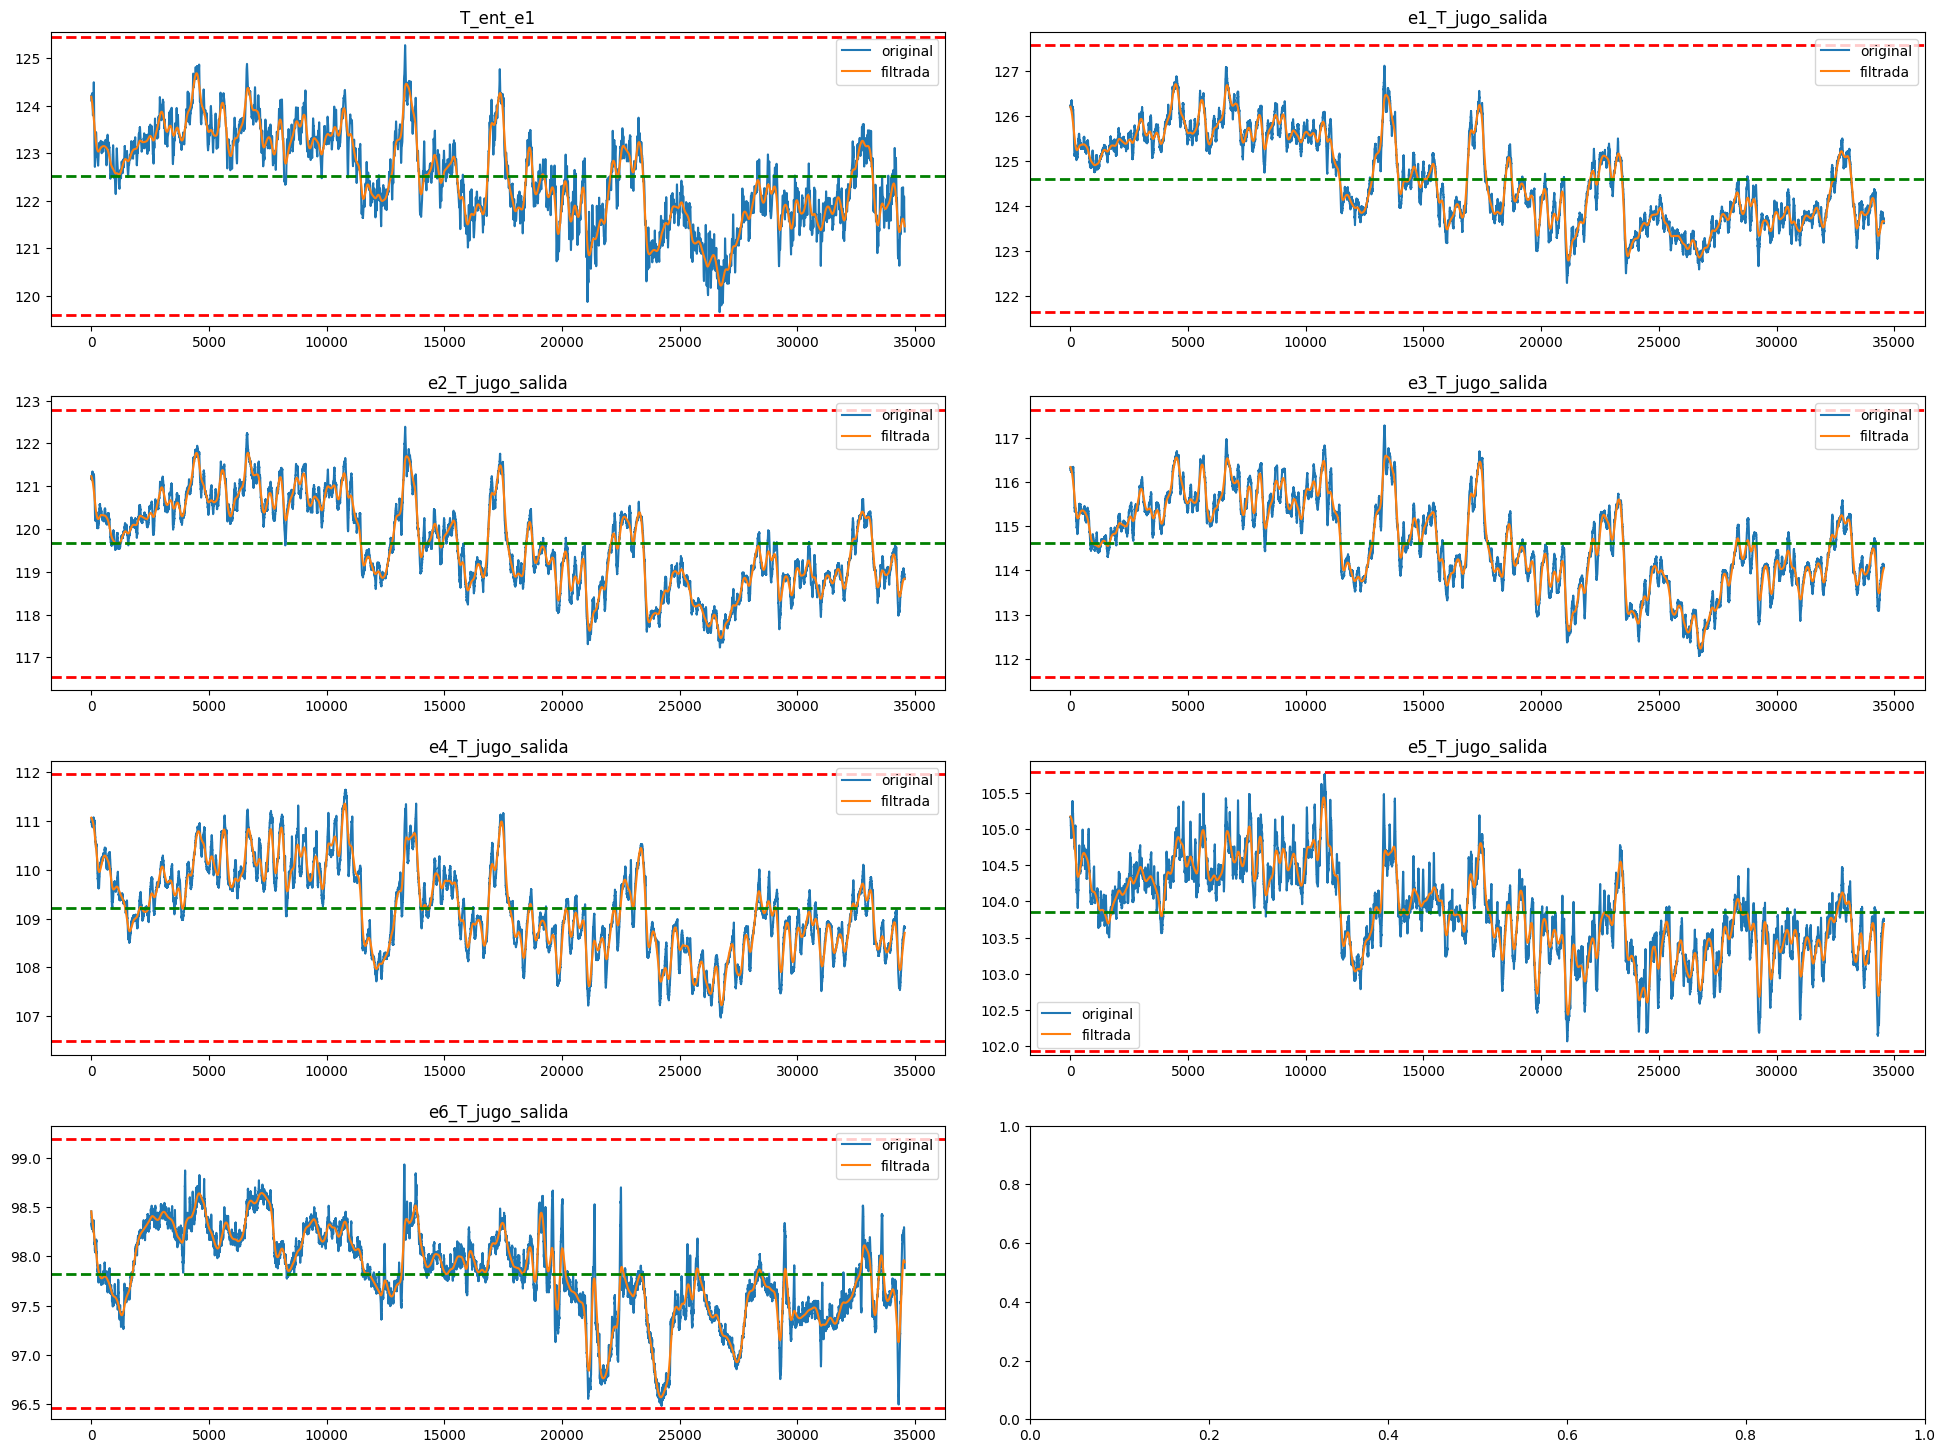

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos
data =  dataFile.loc[:,['T_ent_e1','e1_T_jugo_salida',
'e2_T_jugo_salida', 'e3_T_jugo_salida', 'e4_T_jugo_salida',
'e5_T_jugo_salida', 'e6_T_jugo_salida']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma

    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column], label='original')
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFiltered[column], label='filtrada')
    axs[index // ncolumnsG, index%ncolumnsG ].legend()
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()

TEMPERATURA CAMBIADORES

<Figure size 2000x1500 with 0 Axes>

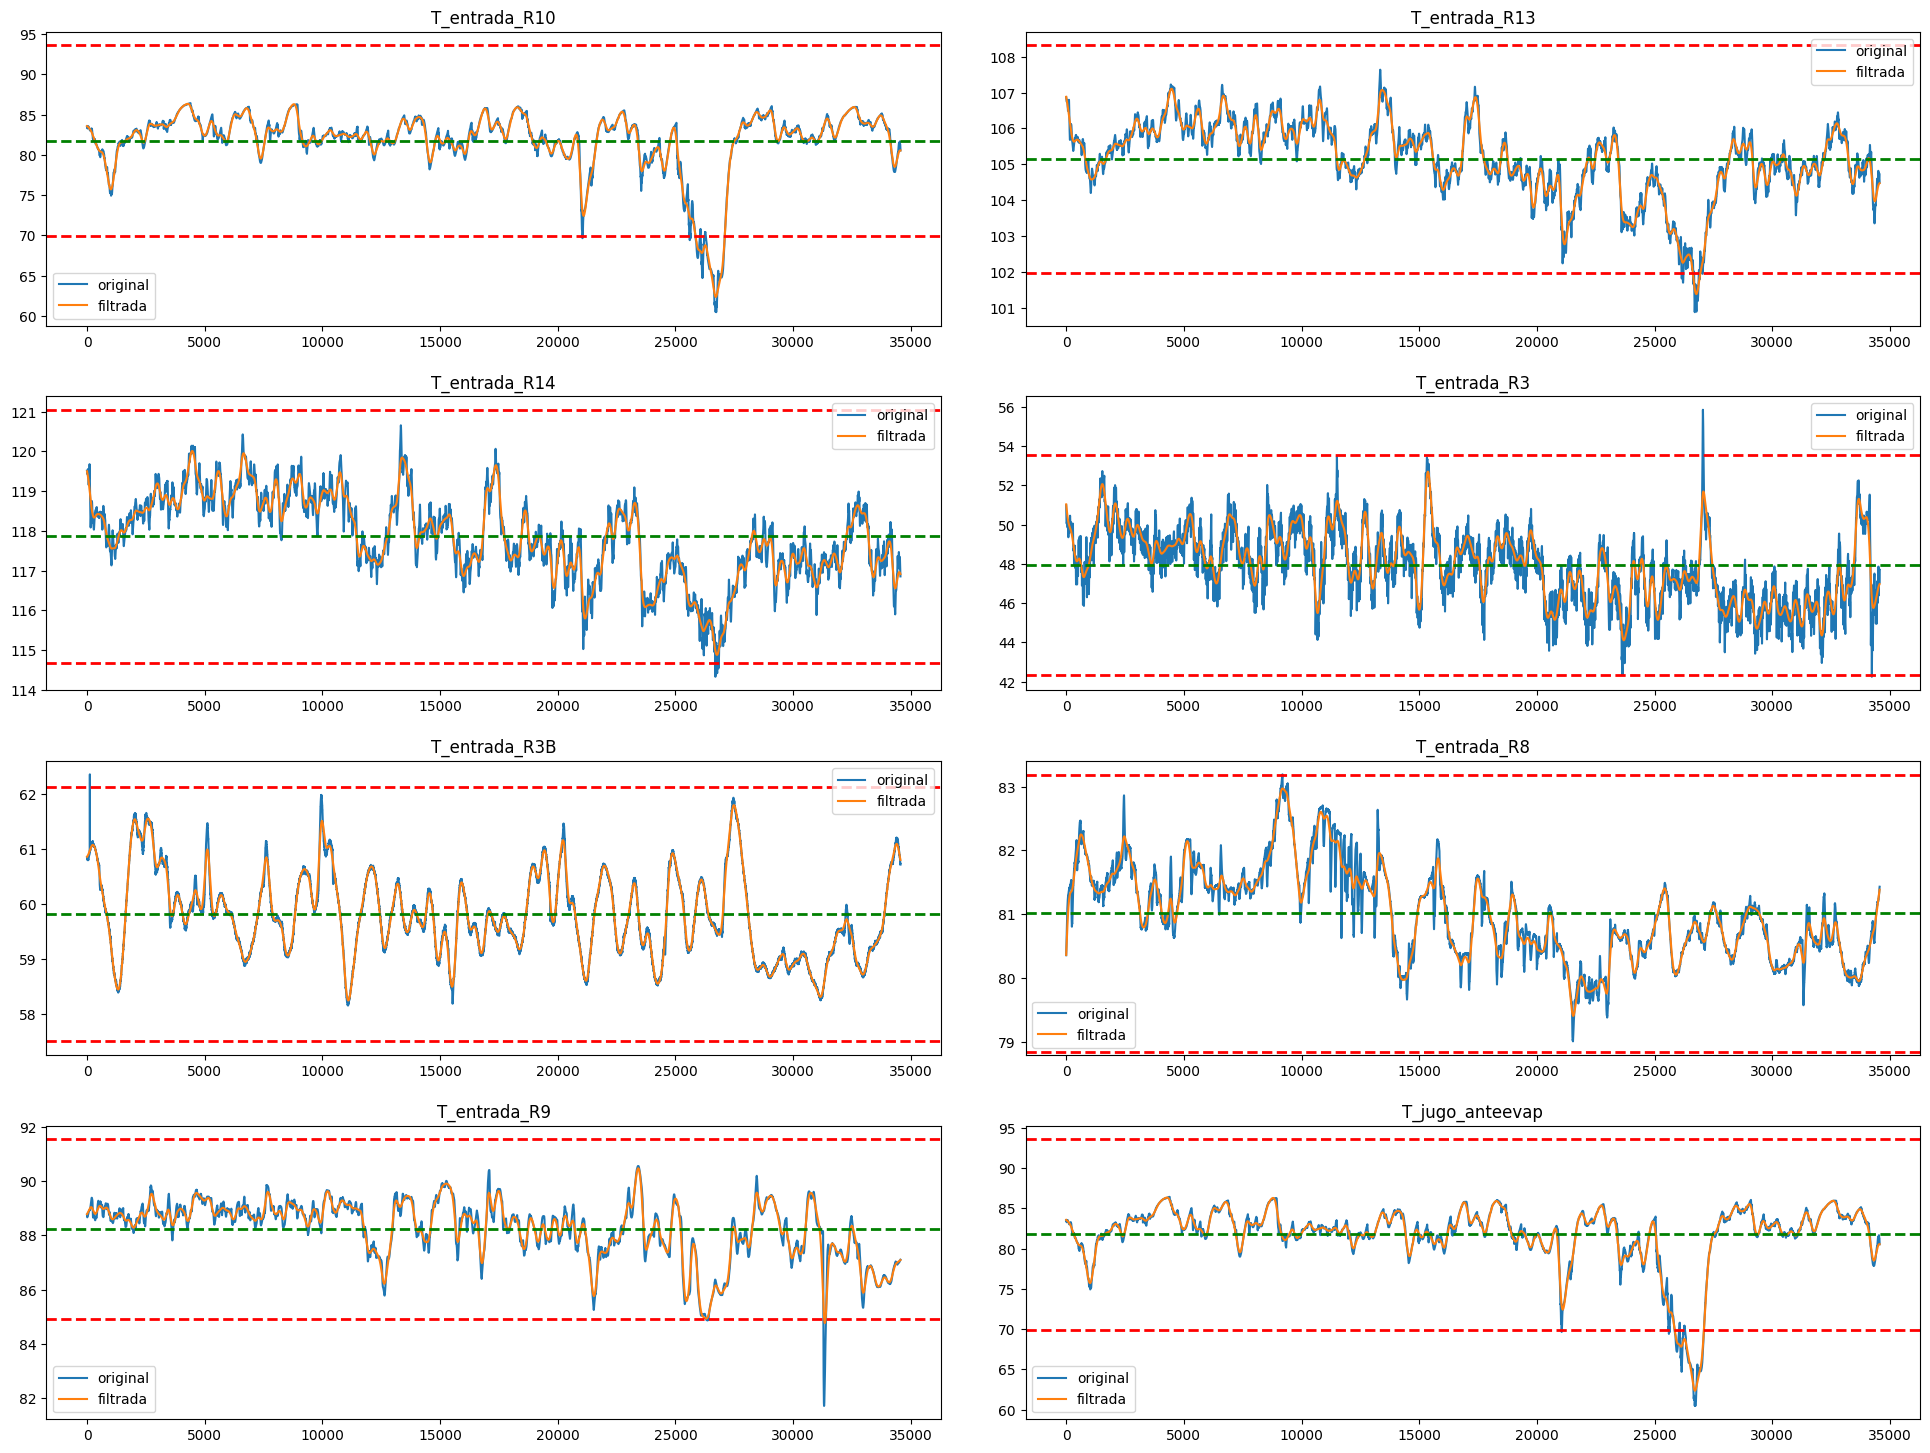

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['T_entrada_R10', 'T_entrada_R13',
       'T_entrada_R14', 'T_entrada_R3', 'T_entrada_R3B', 'T_entrada_R8',
       'T_entrada_R9', 'T_jugo_anteevap']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma

    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column], label='original')
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFiltered[column], label='filtrada')
    axs[index // ncolumnsG, index%ncolumnsG ].legend()
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()

<Figure size 2000x1500 with 0 Axes>

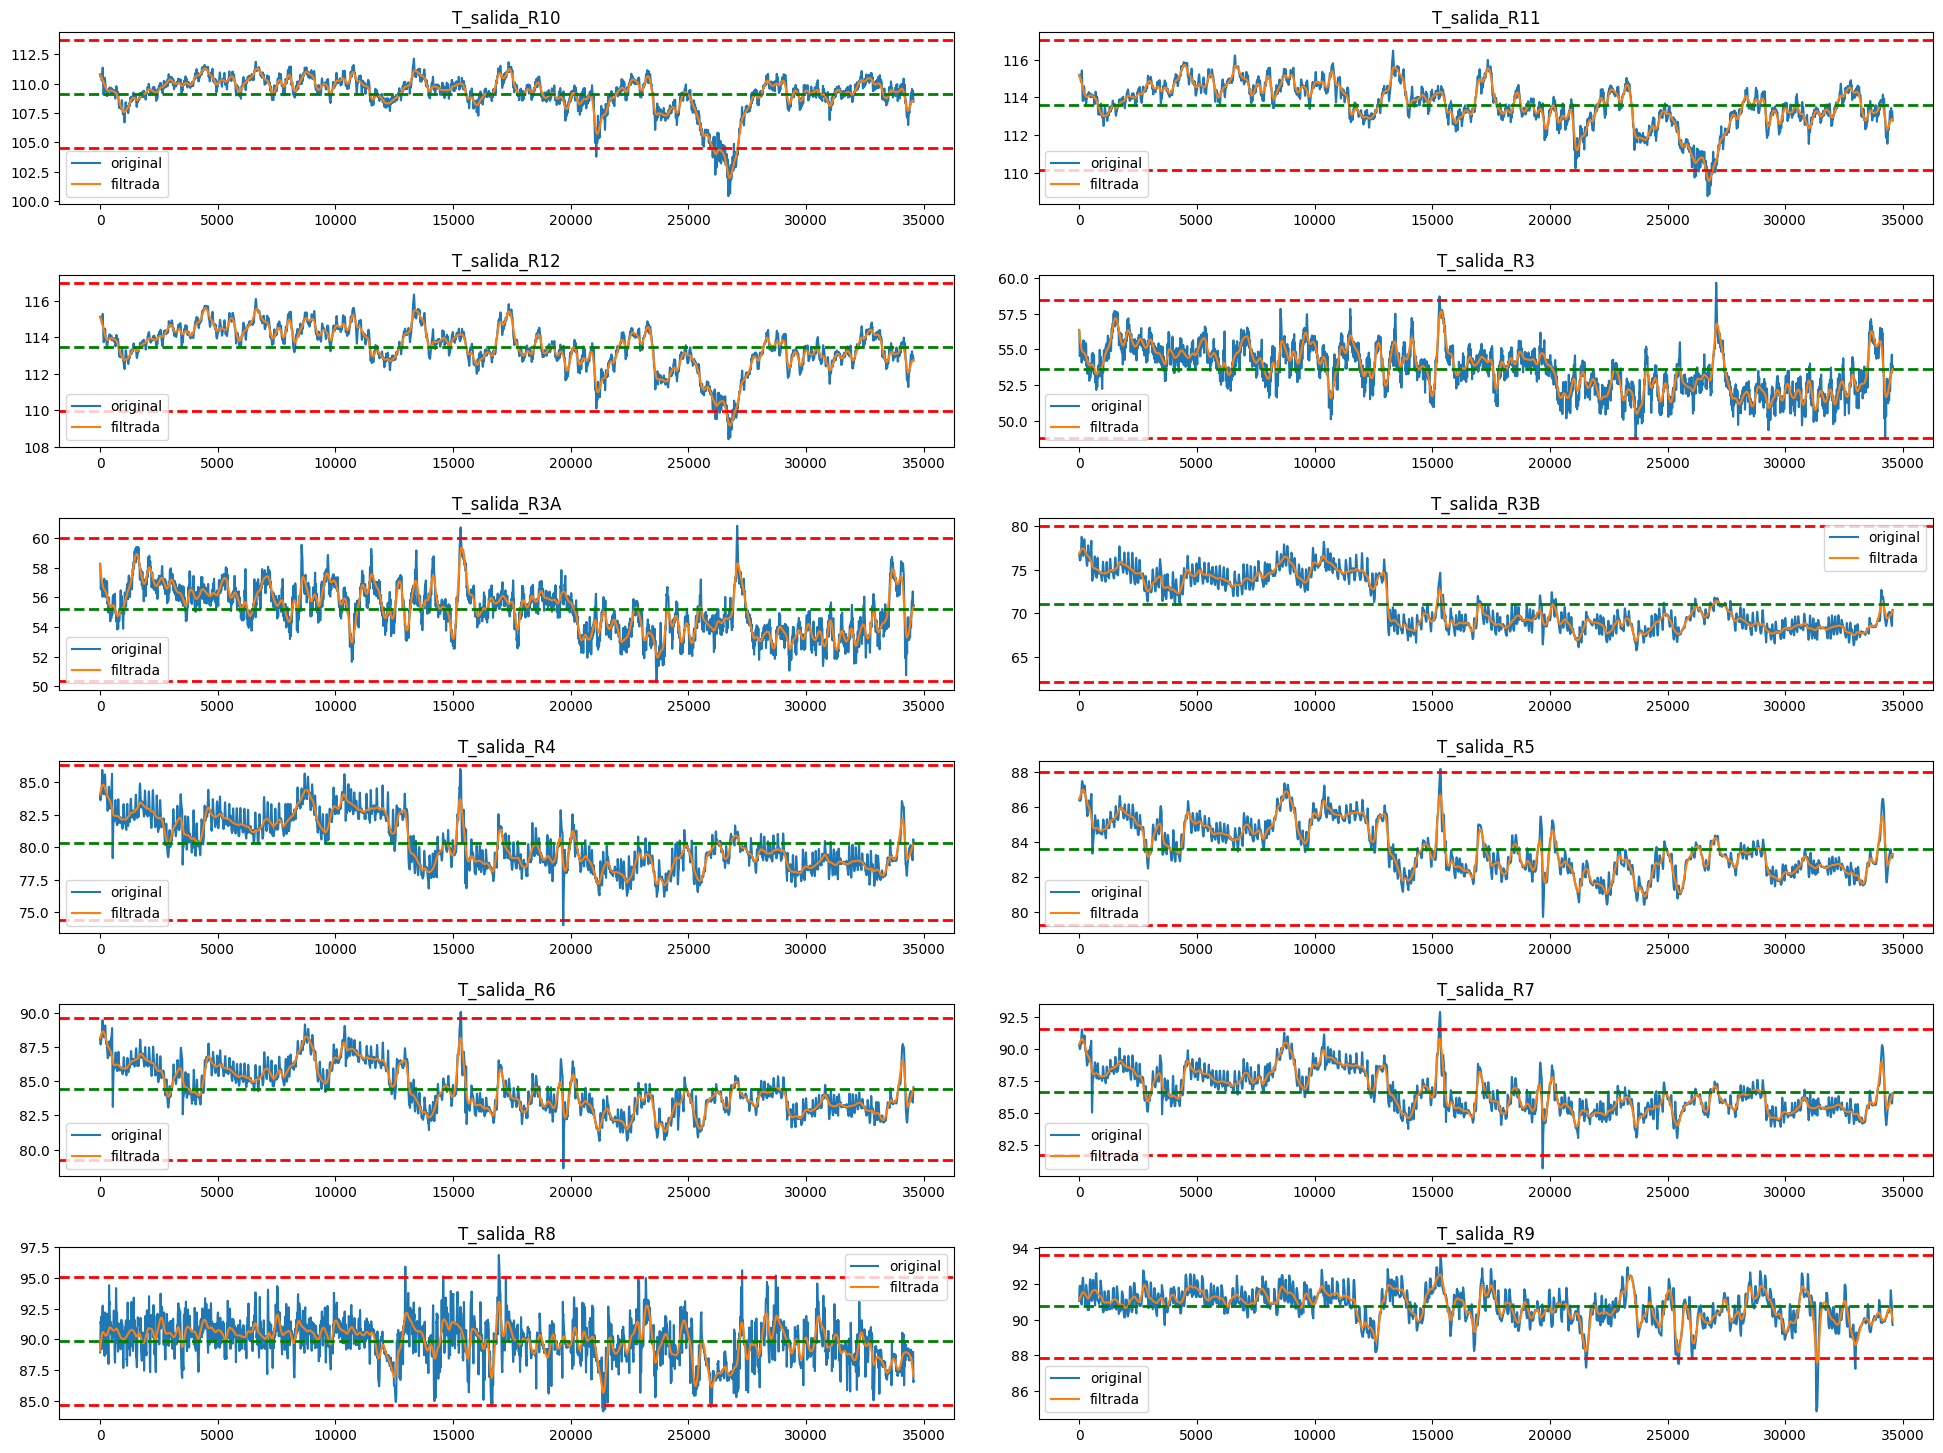

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,[ 'T_salida_R10', 'T_salida_R11',
       'T_salida_R12', 'T_salida_R3', 'T_salida_R3A', 'T_salida_R3B',
       'T_salida_R4', 'T_salida_R5', 'T_salida_R6', 'T_salida_R7',
       'T_salida_R8', 'T_salida_R9']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma

    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column], label='original')
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFiltered[column], label='filtrada')
    axs[index // ncolumnsG, index%ncolumnsG ].legend()
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()

FLUJO MASICO

<Figure size 2000x1500 with 0 Axes>

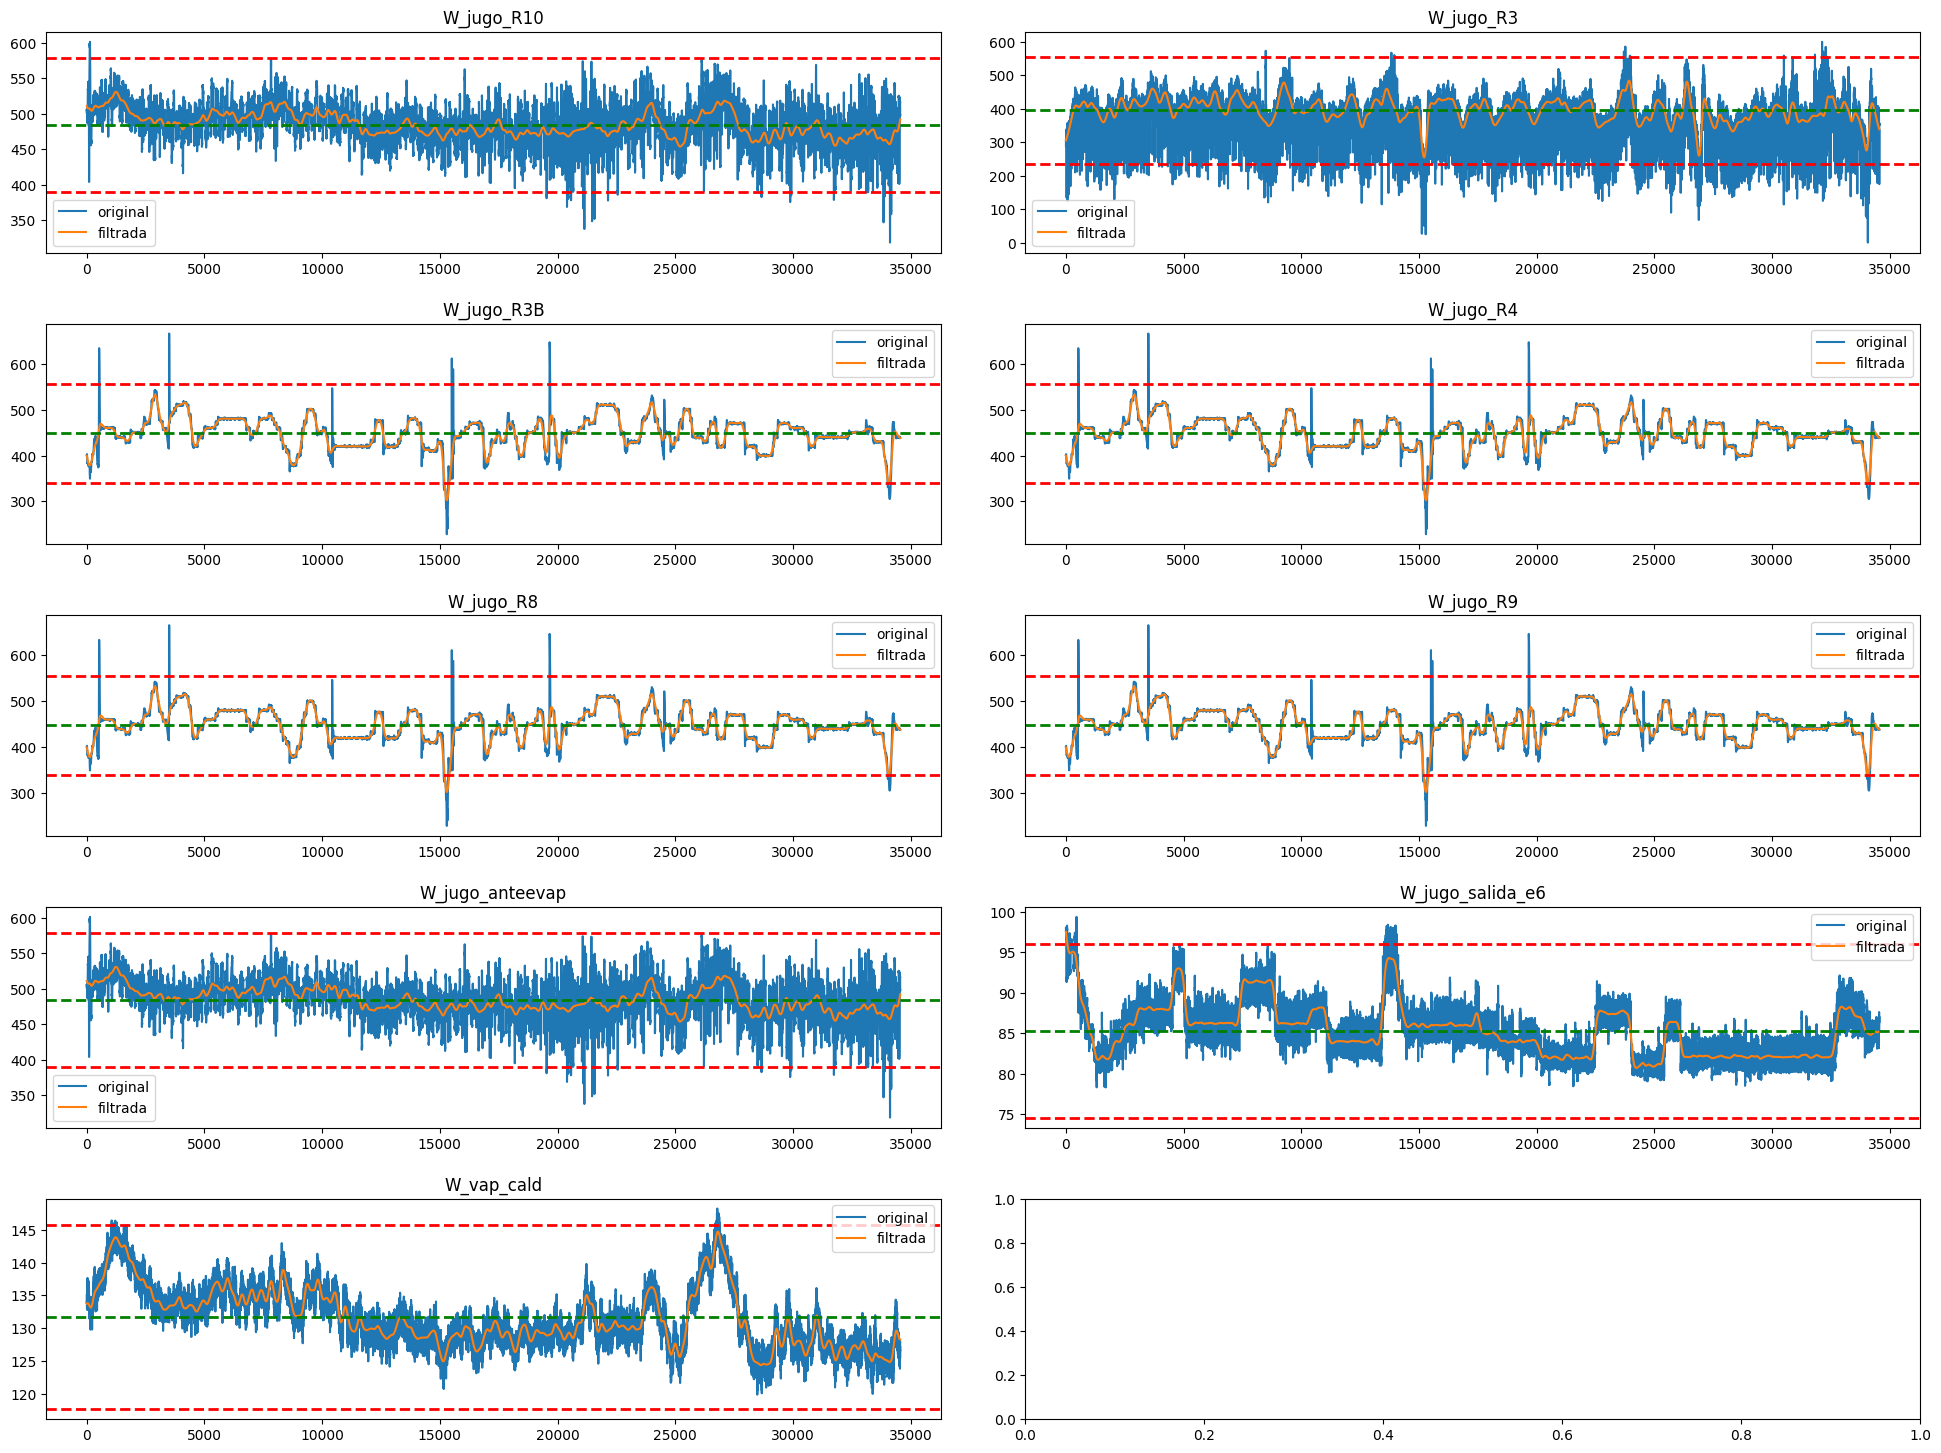

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data =  dataFile.loc[:,['W_jugo_R10',
       'W_jugo_R3', 'W_jugo_R3B', 'W_jugo_R4', 'W_jugo_R8', 'W_jugo_R9',
       'W_jugo_anteevap', 'W_jugo_salida_e6', 'W_vap_cald']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma

    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column], label='original')
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFiltered[column], label='filtrada')
    axs[index // ncolumnsG, index%ncolumnsG ].legend()
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()


EJEMPLO FIGURA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos
data = dataFile.loc[:,['P_vah_e5','P_vah_e6','T_entrada_R10', 'T_salida_R10','T_entrada_R13',
        'T_entrada_R3', 'T_entrada_R9', 'T_salida_R9','W_jugo_R10',
       'W_jugo_R3' ]]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma

    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFile[column], label='original')
    axs[index // ncolumnsG, index%ncolumnsG ].plot(dataFiltered[column], label='filtrada')
    axs[index // ncolumnsG, index%ncolumnsG ].legend()
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axhline(y=mean, color='g', linestyle='dashed', linewidth=2)


# Mostrar los histogramas
plt.show()

